# problem Statement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [13]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [16]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [17]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [18]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [28]:
x_cat=df[['marital','education','loan','housing','contact','poutcome','default','job']]

In [29]:
# one hot encoder for categorical independent variables
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder()
t1_temp=OHE.fit_transform(x_cat).toarray()


In [30]:
t1_temp

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
t1_temp=pd.DataFrame(t1_temp)

In [32]:
t1_temp

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# columns namings
t1_temp.columns=['marital_divorced','marital_married','marital_single','education_primary','education_secondary','education_tertiary','education_unknown','loan_no','loan_yes','housing_no','housing_yes','contact_cellular','contact_telephone','contact_unknown','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','default_no','default_yes','job_admin','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown']

In [34]:
t1_temp

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes,housing_no,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.drop(['marital','education','loan','housing','contact','poutcome','default','job'],axis=1,inplace=True)

In [36]:
df

,age,balance,day,month,duration,campaign,pdays,previous,y
0,58,2143,5,may,261,1,-1,0,no
1,44,29,5,may,151,1,-1,0,no
2,33,2,5,may,76,1,-1,0,no
3,47,1506,5,may,92,1,-1,0,no
4,33,1,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,yes
45207,71,1729,17,nov,456,2,-1,0,yes
45208,72,5715,17,nov,1127,5,184,3,yes
45209,57,668,17,nov,508,4,-1,0,no


In [37]:
df=pd.concat([df,t1_temp],axis=1)

In [38]:
df

,age,balance,day,month,duration,campaign,pdays,previous,y,marital_divorced,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,2143,5,may,261,1,-1,0,no,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,29,5,may,151,1,-1,0,no,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,2,5,may,76,1,-1,0,no,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,1506,5,may,92,1,-1,0,no,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,1,5,may,198,1,-1,0,no,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,nov,977,3,-1,0,yes,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,1729,17,nov,456,2,-1,0,yes,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,72,5715,17,nov,1127,5,184,3,yes,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,57,668,17,nov,508,4,-1,0,no,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [40]:
df['month']=df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,"nov":11,'dec':12})

In [41]:
df.dtypes

age                      int64
balance                  int64
day                      int64
month                    int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
y                       object
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
loan_no                float64
loan_yes               float64
housing_no             float64
housing_yes            float64
contact_cellular       float64
contact_telephone      float64
contact_unknown        float64
poutcome_failure       float64
poutcome_other         float64
poutcome_success       float64
poutcome_unknown       float64
default_no             float64
default_yes            float64
job_admin              float64
job_blue-collar        float64
job_entrepreneur       float64
job_hous

In [49]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [50]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [42]:
df_cont=df[['age','balance','day','month','duration','campaign','pdays','previous']]

In [43]:
# data tranformation for continious variables
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [44]:
MM_cont=MM.fit_transform(df_cont)

In [45]:
MM_cont=pd.DataFrame(MM_cont)

In [46]:
MM_cont

,0,1,2,3,4,5,6,7
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000


In [47]:
MM_cont.columns=['age','balance','day','month','duration','campaign','pdays','previous']

In [48]:
MM_cont

,age,balance,day,month,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000


In [49]:
df.drop(['age','balance','day','month','duration','campaign','pdays','previous'],axis=1,inplace=True)

In [52]:
df=pd.concat([MM_cont,df],axis=1)

In [53]:
df

,age,balance,day,month,duration,campaign,pdays,previous,y,marital_divorced,...,job_unemployed,job_unknown,age,balance,day,month,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000,no,0.0,...,0.0,0.0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000,no,0.0,...,0.0,0.0,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000,no,0.0,...,0.0,0.0,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000,no,0.0,...,0.0,0.0,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000,no,0.0,...,0.0,1.0,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000,yes,0.0,...,0.0,0.0,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000,yes,1.0,...,0.0,0.0,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909,yes,0.0,...,0.0,0.0,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000,no,0.0,...,0.0,0.0,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000


In [55]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [56]:
# Label encoder for dependent variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [57]:
df['y']=LE.fit_transform(df['y'])

In [59]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Model Building

In [60]:
# split the variables
Y=df['y']
X=df.drop(['y'],axis=1)

In [61]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [62]:
X

,age,balance,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,...,job_unemployed,job_unknown,age,balance,day,month,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909,0.0,1.0,...,0.0,0.0,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,0.000000


In [63]:
X.shape

(45211, 48)

In [64]:
#model fitting
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [65]:
logreg.fit(X,Y)

C:\Users\SUBHASH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred=logreg.predict(X)

# Testing Model Accuracy

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [74]:
cm=confusion_matrix(Y,y_pred)

In [75]:
cm

array([[39042,   880],
       [ 3637,  1652]], dtype=int64)

In [70]:
accuracy_score(Y,y_pred)

0.9000906858950255

In [71]:
recall_score(Y,y_pred)

0.3123463792777463

In [72]:
precision_score(Y,y_pred)

0.6524486571879937

In [73]:
f1_score(Y,y_pred)

0.42245237181946044

In [76]:
#for specificity
TN=cm[0,0]
FP=cm[0,1]
TN/(TN+FP)


0.9779570161815541

In [79]:
y_proba=logreg.predict_proba(X)[:,1]

In [80]:
y_proba

array([0.02754935, 0.0177684 , 0.00454785, ..., 0.98500072, 0.16189887,
       0.19395613])

In [81]:
df['y_proba']=pd.DataFrame(y_proba)

In [83]:
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,marital_divorced,...,job_unknown,age,balance,day,month,duration,campaign,pdays,previous,y_proba
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.0,0.0,0.0,0,0.0,...,0.0,0.519481,0.092259,0.133333,0.363636,0.053070,0.0,0.0,0.0,0.027549
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.0,0.0,0.0,0,0.0,...,0.0,0.337662,0.073067,0.133333,0.363636,0.030704,0.0,0.0,0.0,0.017768
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.0,0.0,0.0,0,0.0,...,0.0,0.194805,0.072822,0.133333,0.363636,0.015453,0.0,0.0,0.0,0.004548
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.0,0.0,0.0,0,0.0,...,0.0,0.376623,0.086476,0.133333,0.363636,0.018707,0.0,0.0,0.0,0.010546
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.0,0.0,0.0,0,0.0,...,1.0,0.194805,0.072812,0.133333,0.363636,0.040260,0.0,0.0,0.0,0.044591


In [84]:
from sklearn.metrics import roc_curve,roc_auc_score

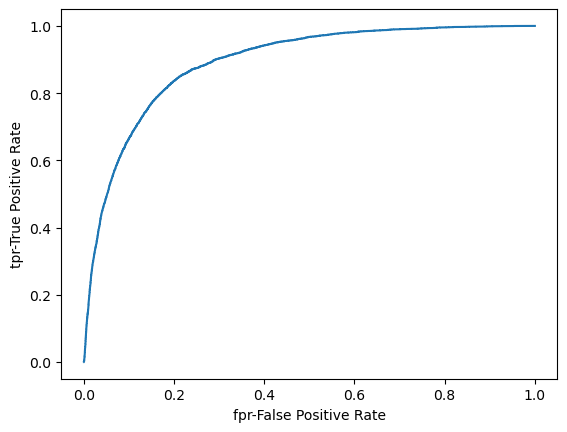

In [85]:
#ROC
fpr,tpr,_=roc_curve(Y,y_proba)
plt.plot(fpr,tpr)
plt.ylabel('tpr-True Positive Rate')
plt.xlabel('fpr-False Positive Rate')
plt.show()


In [87]:
#AUC
auc=roc_auc_score(Y,y_proba)
auc.round(3)

0.891

In [90]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     39922
           1       0.65      0.31      0.42      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.68     45211
weighted avg       0.88      0.90      0.88     45211



# Model Validation by train and test split


In [89]:
#data partition 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [91]:
#fit the model
logreg.fit(X_train,Y_train)

C:\Users\SUBHASH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
# predict the model
Y_pred_train=logreg.predict(X_train)

In [93]:
Y_pred_test=logreg.predict(X_test)

In [96]:
ac1=accuracy_score(Y_train,Y_pred_train)
print("training accuracy ",ac1.round(3))

training accuracy  0.9


In [97]:
ac2=accuracy_score(Y_test,Y_pred_test)
print("test accuracy ",ac2.round(3))

test accuracy  0.902
